In [60]:
import numpy as np
import scipy.io

from sklearn.linear_model import LogisticRegression

dataset = scipy.io.loadmat('MNISTmini.mat')

#set class label
label = [5, 9]

#get training data from dataset
train_fea_data = dataset['train_fea1']
train_gnd_data = dataset['train_gnd1']


#get 5s and 9s data
cls01_data = np.array(np.where(train_gnd_data[:,0] == label[0])) #class 5 
cls02_data = np.array(np.where(train_gnd_data[:,0] == label[1])) #class 9

#data split
cls05_train = cls01_data[0,0:500]
cls05_val = cls01_data[0,500:1000]
cls05_test = cls01_data[0,1000:1500]

cls09_train = cls02_data[0,0:500]
cls09_val = cls02_data[0,500:1000]
cls09_test = cls02_data[0,1000:1500]

# all_index = np.concatenate(cls01_data, cls02_data)

#concatenate for single train, val and test dataset
train_class = np.concatenate([cls05_train, cls09_train])
val_class = np.concatenate([cls05_val, cls09_val])
test_class = np.concatenate([cls05_test, cls09_test])

#define X and Y for training and validation set
X_train = train_fea_data[train_class,:]
Y_train = train_gnd_data[train_class,:]

X_val = train_fea_data[val_class,:]
Y_val = train_gnd_data[val_class,:]

#logisticClf with C=2.0
logitClf = LogisticRegression(penalty='l2', C=2.0, solver='liblinear')
logitClf.fit(X_train, Y_train.ravel())

LogisticRegression(C=2.0, solver='liblinear')

In [61]:
predict = logitClf.predict(train_fea_data[test_class,:])
logitClf.score(train_fea_data[test_class,:], train_gnd_data[test_class,:])

0.95

In [62]:
#fitting model on validation data
logitClf.fit(X_val, Y_val.ravel())

LogisticRegression(C=2.0, solver='liblinear')

In [63]:
predict = logitClf.predict(train_fea_data[test_class,:])
logitClf.score(train_fea_data[test_class,:], train_gnd_data[test_class,:])

0.967

In [81]:
#define the logisticClf with C=0.001
logitClf_01 = LogisticRegression(penalty='l2', C=0.001, solver='liblinear')
logitClf_01.fit(X_train, Y_train.ravel())

LogisticRegression(C=0.001, solver='liblinear')

In [82]:
predict_test_data = logitClf_01.predict(train_fea_data[test_class,:])
logitClf_01.score(train_fea_data[test_class,:], train_gnd_data[test_class,:])

0.958

In [84]:
#prediction on validation data
predict_val_data = logitClf_01.predict(train_fea_data[val_class,:])
logitClf_01.score(train_fea_data[val_class,:], train_gnd_data[val_class,:])

0.974

Text(69.0, 0.5, 'Truth')

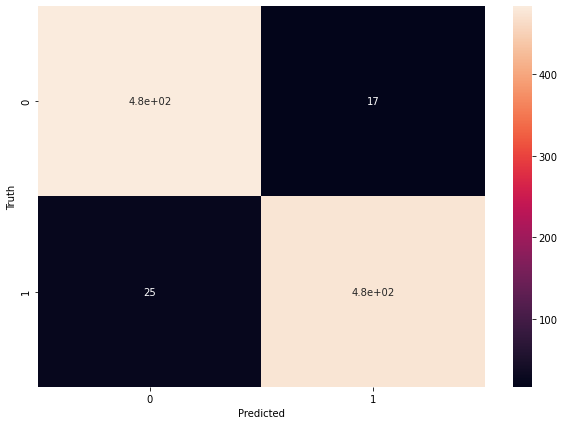

In [85]:
#confusion matrix on test data prediction
test_matrix = confusion_matrix(train_gnd_data[test_class,:], predict_test_data )

import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(test_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

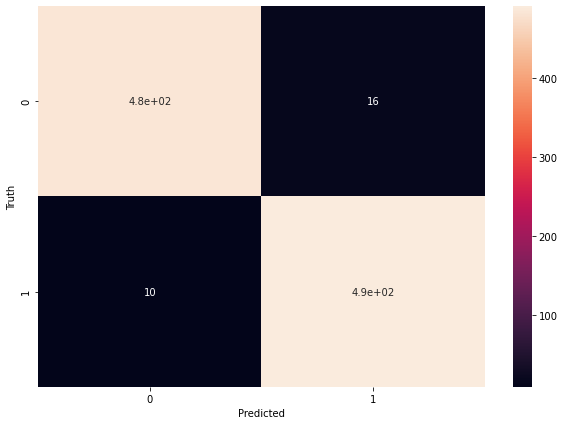

In [86]:
#confusion matrix on validation data prediction
test_matrix = confusion_matrix(train_gnd_data[val_class,:], predict_val_data )

import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(test_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [78]:
#define the logisticClf with C=10^-7
logitClf_02 = LogisticRegression(penalty='l2', C=0.00000001, solver='liblinear')
logitClf_02.fit(X_train, Y_train.ravel())

#prediction for test_data 
predict_train_test = logitClf_02.predict(train_fea_data[test_class,:])
logitClf_02.score(train_fea_data[test_class,:], train_gnd_data[test_class,:])

0.939

In [79]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train_gnd_data[test_class,:], predict_train_test )

Text(69.0, 0.5, 'Truth')

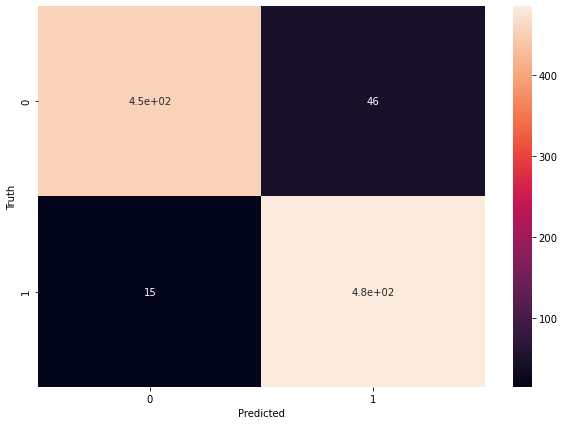

In [80]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [75]:
#prediction of model with C=10^-7 on validation data
predict_train_val = logitClf_02.predict(train_fea_data[val_class,:])
logitClf_02.score(train_fea_data[val_class,:], train_gnd_data[val_class,:])

0.953

Text(69.0, 0.5, 'Truth')

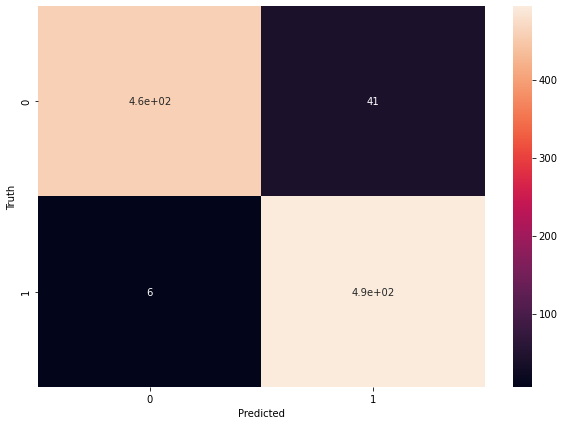

In [77]:
matrix_train_val = confusion_matrix(train_gnd_data[val_class,:], predict_train_val )
plt.figure(figsize=(10,7))
sn.heatmap(matrix_train_val, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')